In [3]:
import twarc
import json
import pandas as pd
import dask.dataframe as dd
from datetime import datetime

In [ ]:
df = dd.read_csv('~/Downloads/full_dataset_clean.tsv', sep = '\t')

# define filtering logic
df = df[(df['country_place'] == 'US') & (df['lang'] == 'en')]
#df = df[df['lang'] == 'en']

# apply filtering logic and convert to pandas dataframe
df = df.compute()

In [ ]:
group = df.groupby("date")
group.count()
len(df)

In [ ]:
# convert str date to datetime
pd.to_datetime(df['date'], infer_datetime_format=True)
df = df[df['date'] >= "2020-03-01"]

In [ ]:
# command line: twarc2 hydrate tweet_ids_small.txt  hydrated_tweet_ids_small.jsonl 
# twarc2 csv hydrated_tweet_ids_small.jsonl hydrated_tweet_ids_small.csv
#df['tweet_id'].to_csv('~/capp30254/proj_test/tweet_ids.txt', sep='\n', index=False, header=False)

In [ ]:
df0 = df.iloc[:500000, :]
df1 = df.iloc[500001:1000000, :]
df2 = df.iloc[1000001:1500000, :]
df3 = df.iloc[1500001:2000000, :]
df4 = df.iloc[2000001:, :]

In [ ]:
dfs = [df0, df1, df2, df3, df4]
for i, d in enumerate(dfs):
    d['tweet_id'].to_csv(f'~/capp30254_proj_test/data/tweet_ids/tweet_ids_{i}.txt', sep='\n', index=False, header=False)

In [ ]:
# hydrate tweets
# twarc2 hydrate tweet_ids_4.txt  hydrated_tweet_ids_4.jsonl
# twarc2 csv hydrated_tweet_ids_4.jsonl hydrated_tweet_ids_4.csv


In [ ]:
# read hydrated tweets csv
tw0 = pd.read_csv('~/capp30254_fight_potatoes/data/tweet_ids/hydrated_tweet_ids_0.csv')
tw1 = pd.read_csv('~/capp30254_fight_potatoes/data/tweet_ids/hydrated_tweet_ids_1.csv')
tw2 = pd.read_csv('~/capp30254_fight_potatoes/data/tweet_ids/hydrated_tweet_ids_2.csv')
tw3 = pd.read_csv('~/capp30254_fight_potatoes/data/tweet_ids/hydrated_tweet_ids_3.csv')
tw4 = pd.read_csv('~/capp30254_fight_potatoes/data/tweet_ids/hydrated_tweet_ids_4.csv')


In [ ]:
tw = pd.concat([tw0, tw1, tw2, tw3, tw4])

In [ ]:
tw = tw[['id', 'created_at', 'text', 'source', 'public_metrics.like_count', 'public_metrics.quote_count',
'public_metrics.reply_count', 'public_metrics.retweet_count', 'author.public_metrics.followers_count', 'author.verified',
'geo.full_name']]

In [ ]:
tw.to_csv('~/capp30254_fight_potatoes/data/tweet_ids/tweet_ids_full.csv')

In [4]:
#sentiment analysis
import textblob
tw = pd.read_csv('~/capp30254_fight_potatoes/data/tweet_ids/tweet_ids_full.csv')

In [9]:
# get polarity & subjectivity for each tweet
tw['polarity'] = tw.apply(lambda row: textblob.TextBlob(row['text']).sentiment.polarity, axis = 1)
tw['subjectivity'] = tw.apply(lambda row: textblob.TextBlob(row['text']).sentiment.subjectivity, axis = 1)

In [27]:
tw['created_at'].head
tw['date'] = pd.to_datetime(tw['created_at'], infer_datetime_format=True).dt.date
#tw['date'].dt.date

In [46]:
tw_daily = tw.groupby(['date'])['polarity', 'subjectivity'].mean().reset_index()

/var/folders/bq/y6jssnk56235t8wjc47m1fdw0000gn/T/ipykernel_55276/2018422313.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tw_daily = tw.groupby(['date'])['polarity', 'subjectivity'].mean().reset_index()


In [58]:
tw_daily.tail

<bound method NDFrame.tail of            date  polarity  subjectivity
0    2020-03-01  0.006974      0.370865
1    2020-03-02  0.031291      0.262566
2    2020-03-03  0.057315      0.292760
3    2020-03-04  0.031429      0.376230
4    2020-03-05 -0.037989      0.283284
..          ...       ...           ...
780  2022-04-20  0.042498      0.357242
781  2022-04-21  0.077695      0.340236
782  2022-04-22  0.056718      0.377996
783  2022-04-23  0.104066      0.399033
784  2022-04-24  0.003033      0.421859

[785 rows x 3 columns]>

In [37]:
import matplotlib.pylab as plt
#import matplotlib.pyplot as plt
%matplotlib inline

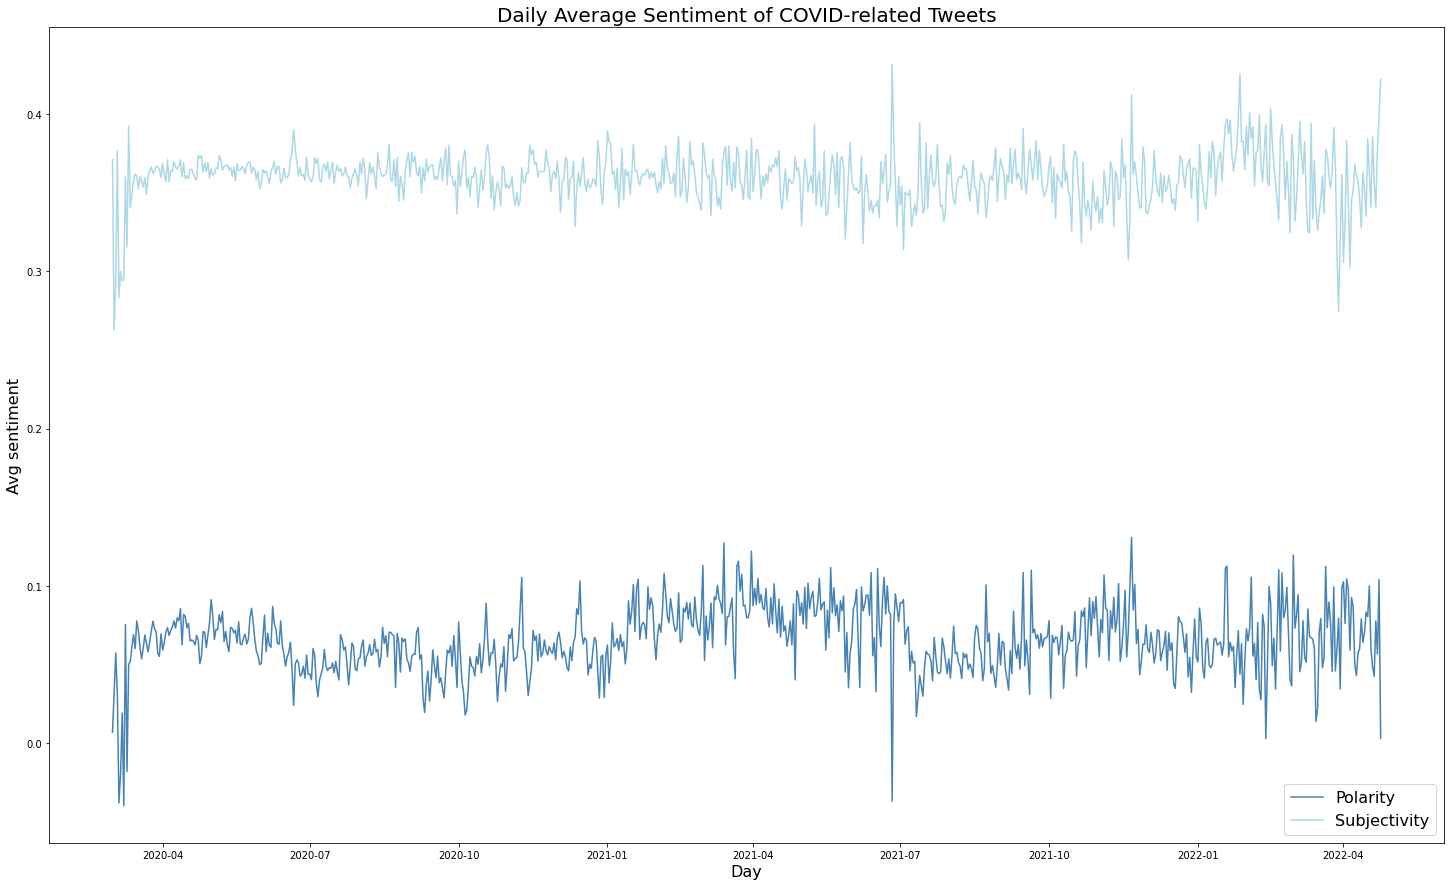

In [56]:
# Plot daily avg polarity and subjectivity
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,15))
ax.plot(tw_daily['date'], tw_daily['polarity'], color="steelblue", label='Polarity')
ax.plot(tw_daily['date'], tw_daily['subjectivity'], color="lightblue", label='Subjectivity')

ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("Day", fontsize=16)
ax.set_ylabel("Avg sentiment", fontsize=16)
plt.title("Daily Average Sentiment of COVID-related Tweets", fontsize=20)
plt.show()

In [39]:
tw['polarity'].describe()

count    1.865853e+06
mean     6.194625e-02
std      2.927068e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e-01
max      1.000000e+00
Name: polarity, dtype: float64

In [57]:
tw_daily.to_csv('~/capp30254_fight_potatoes/data/tweet_ids/tweet_ids_daily_agg.csv')